Libraries

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""Physique numérique - TD 3 - Numerical optimization"""
"""Encadrant : benjamin.guiselin@ens-lyon.fr"""

#Importation des modules

import numpy as np
import matplotlib.pyplot as plt
import math
import random
#plt.close('all')

Functions

In [ ]:
def V(x,y,a,b,fl = True):
    absol = np.abs(y-x)
    if fl:
        if absol == 0:
            absol = 1e-16
    else:
        absol[absol==0] = 1e-16
    return a*(x**2+y**2) + b*(x**4+y**4) + 1/absol

def grad_V(x,y,a,b,fl = True):
    absol = np.abs(y-x)
    if fl:
        if absol == 0:
            absol = 1e-16
    else:
        absol[absol==0] = 1e-16
    return np.array((-(x-y)/absol**3 + 2*a*x + 4*b*x**3,(x-y)/absol**3 + 2*a*y + 4*b*y**3))


In [26]:
#1.2

A = 1
B = 0

X = np.linspace(-2,2,100)
Y = np.linspace(-2,2,100)
X,Y = np.meshgrid(X,Y)

Z = V(X,Y,A,B, fl = False)


# fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# surf = ax.plot_surface(X, Y, Z,linewidth=0,color = 'g', antialiased=False)
# ax.set_zlim(1, 10)

#1.3

Z_1 = grad_V(X,Y,A,B,fl = False)
# fig2, ax2 = plt.subplots(subplot_kw={"projection": "3d"})
# surf2 = ax2.plot_surface(X, Y, Z_1[1],linewidth=0,color = 'b', antialiased=False)
# ax2.set_zlim(1, 10)

a,b = -2,2
eps = 1e-2
eta = 1e-6
x_0 = (random.uniform(a, b),random.uniform(a, b))

while np.linalg.norm(grad_V(x_0[0],x_0[1],A,B)) > eta :
    x_0 += -eps * grad_V(x_0[0],x_0[1],A,B)
    #print(x_0)

print(x_0)

[ 0.49999965 -0.50000035]


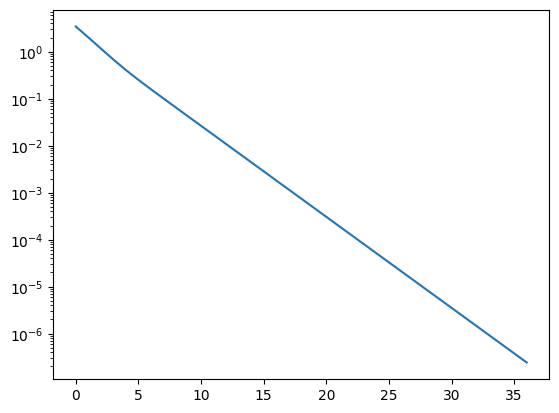

In [32]:
#1.3 & 1.4

Z_1 = grad_V(X,Y,A,B,fl = False)
# fig2, ax2 = plt.subplots(subplot_kw={"projection": "3d"})
# surf2 = ax2.plot_surface(X, Y, Z_1[1],linewidth=0,color = 'b', antialiased=False)
# ax2.set_zlim(1, 10)

a,b = -2,2
eps = 1e-1
eta = 1e-3
x_0 = (random.uniform(a, b),random.uniform(a, b))
V_0 = []
X_0 = []

while np.linalg.norm(grad_V(x_0[0],x_0[1],A,B)) > eta :
    x_0 += -eps * grad_V(x_0[0],x_0[1],A,B)
    V_0.append(V(x_0[0],x_0[1],A,B))
    X_0.append(list(x_0))
    #print(x_0)

#1.4

fig2, axes2 = plt.subplots(1)
ax2=axes2
s2 = ax2.semilogy(np.array(V_0)-3/2)

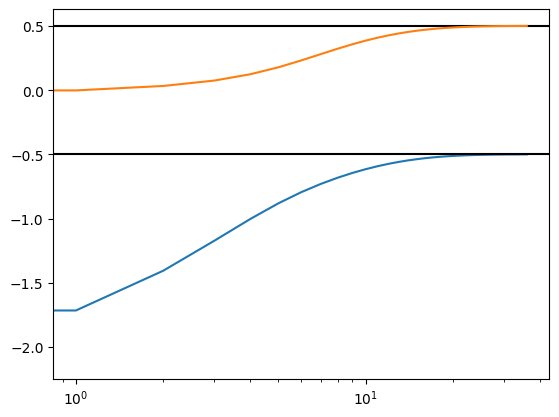

In [43]:
#1.5

fig3, axes3 = plt.subplots(1)
ax3=axes3
s3 = ax3.semilogx(np.array(X_0)[:,0])
ax3.axhline(0.5,color='k')
s3 = ax3.semilogx(np.array(X_0)[:,1])
ax3.axhline(-0.5,color='k')

In [50]:
EPS = np.logspace(-2,-1,100)
a,b = -2,2
eps = 1e-1
eta = 1e-3
x_00 = (random.uniform(a, b),random.uniform(a, b))
N_EPS=np.zeros(100)
for i,eps in enumerate(EPS):
    V_0 = []
    X_0 = []

    while np.linalg.norm(grad_V(x_00[0],x_00[1],A,B)) > eta :
        x_0 += -eps * grad_V(x_0[0],x_0[1],A,B)
        V_0.append(V(x_0[0],x_0[1],A,B))
        X_0.append(list(x_0))
    print(len(X_0))
    N_EPS[i]=len(X_0)

KeyboardInterrupt: 

In [ ]:
plt.semilogx(EPS,N_EPS)
plt.xlabel('log($\\eps$)')
plt.ylabel('$N_conv$')